# ABoVE: Soil Active Layer Thaw Depths at CRREL sites near Fairbanks, Alaska, 2014-2018

### See the manual for this data here: https://daac.ornl.gov/cgi-bin/dsviewer.pl?ds_id=1701

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from datetime import datetime

%matplotlib inline

In [149]:
df = pd.read_csv(r'C:\Users\emack\Documents\AboveSoil\Active_Layer_Thaw_Depths_1701\Active_Layer_Thaw_Depths_1701\data\Thaw_depth_four_sites_near_fairbanks.csv')

In [150]:
df.head()

,year,site,northing,easting,latitude,longitude,thaw_depth,type
0,2014,Creamer's Field,7193915.5,465013.5,64.867711,-147.738285,67.0,Mixed Forest
1,2014,Creamer's Field,7193918.9,465011.7,64.867742,-147.738323,70.0,Mixed Forest
2,2014,Creamer's Field,7193923.3,465011.4,64.867781,-147.738331,67.0,Mixed Forest
3,2014,Creamer's Field,7193927.2,465011.5,64.867816,-147.738330,72.0,Mixed Forest
4,2014,Creamer's Field,7193930.7,465010.8,64.867847,-147.738345,76.0,Mixed Forest


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2270 entries, 0 to 2269
Data columns (total 8 columns):
year          2270 non-null int64
site          2270 non-null object
northing      2270 non-null float64
easting       2270 non-null float64
latitude      2270 non-null float64
longitude     2270 non-null float64
thaw_depth    2257 non-null float64
type          2270 non-null object
dtypes: float64(5), int64(1), object(2)
memory usage: 142.0+ KB


# Data-Cleaning

# Loop through the 'type' column to give it an 'int' value so I can work with it.
### The 'type' column describes the type of ground cover over the transect site

In [152]:
ground_types = ['Disturbed', 'Eroded', 'Mixed Forest', 'Moss Spruce Forest', 
                'Tussock Tundra', 'Wetland']

for i, row in df.iterrows(): # use the pandas 'iterrows() function'
    unique_id = i
# now we start replacing text values with integers in order to work with the data
    ground_type = row['type'] # here we integer the "Mixed Forest" rows
    if ground_type == 'Mixed Forest':
        df['type'].replace(to_replace=['Mixed Forest'], value=3, inplace=True)
        
    else: # here we integer the 'Eroded' rows
        if ground_type == 'Eroded':
            df['type'].replace(to_replace=['Eroded'], value=2, inplace=True)
            
        else: # here we integer the 'Disturbed' rows
            if ground_type == 'Disturbed':
                df['type'].replace(to_replace=['Disturbed'], value=1, inplace=True)
                
            else: # here we integer the 'Moss Spruce Forest' rows
                if ground_type == 'Moss Spruce Forest':
                    df['type'].replace(to_replace=['Moss Spruce Forest'], value=4, inplace=True)
            
                else: # here we integer the 'Tussock Tundra' rows
                    if ground_type == 'Tussock Tundra':
                        df['type'].replace(to_replace=['Tussock Tundra'], value=5, inplace=True)  
                        
                    else: # here we integer the 'Wetland' rows
                        if ground_type == 'Wetland':
                            df['type'].replace(to_replace=['Wetland'], value=6, inplace=True)
    

df['type'].head() # verify it worked 

0    3
1    3
2    3
3    3
4    3
Name: type, dtype: int64

# Create a frequency table for the Ground-Cover Type

In [153]:
df2 = pd.value_counts(df.type).to_frame().reset_index().rename(columns={'index':'Count'}).rename(columns={'type':'Ground Type'})
df2

,Count,Ground Type
0,5,765
1,4,588
2,3,374
3,1,292
4,6,237
5,2,14


# Convert 'year' to data time format.

In [154]:
count = 0
for date in df['year']:
    count += 1
     
    
count

2270

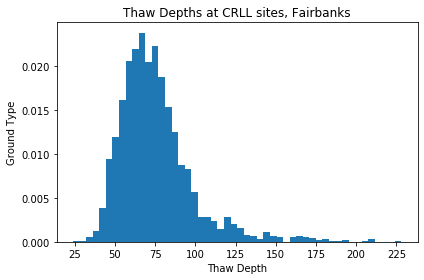

In [155]:




x = df['type']
y =df['thaw_depth']



num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(y, num_bins, density=1)


ax.set_xlabel('Thaw Depth')
ax.set_ylabel('Ground Type')
ax.set_title(r'Thaw Depths at CRLL sites, Fairbanks')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()